# 2.3 Empirische Quantilfunktion

In [1]:
source("util.R")

Hilfsfunktion zur Erzeugung des Plots

In [2]:
empirical_qplot <- function(data, ticks = TRUE, inc = 1, with_title = TRUE, title_size=20) {
  sorted_data <- sort(data)
  n <- length(sorted_data)
  probs <- ((1:n)-0.5) / n
  
  df <- data.frame(probs = probs, values = sorted_data)
  title_text = sprintf("Empirische Quantilfunktion (n=%d)", n)
  gg <- ggplot(df, aes(x = probs, y = values)) +
               geom_point(color = "red") +
               geom_line(color = "blue") +
               xlab("p") + ylab("x")
  
  if (ticks) {
    probs_subset <- probs[seq(1, n, by = inc)]
    if ((n+1) %% inc != 0) {
      probs_subset <- c(probs_subset, probs[n])
    }
    gg <- gg + 
          scale_x_continuous(breaks = probs_subset,
                             labels = scales::number_format(accuracy = 0.01)) +
          theme_bw() +
          theme(axis.text = element_text(size = 10, color = "black"))
  }
  if (with_title) {
    title_text = sprintf("Empirische Quantilfunktion (n=%d)", n)
    gg <- gg + labs(title = title_text, x = "p", y = "x") +
               theme_centered_title(size = title_size)
  }
  gg
}


## Empirische Quantilfunktion einer Stichprobe der Normalverteilung (n=10)

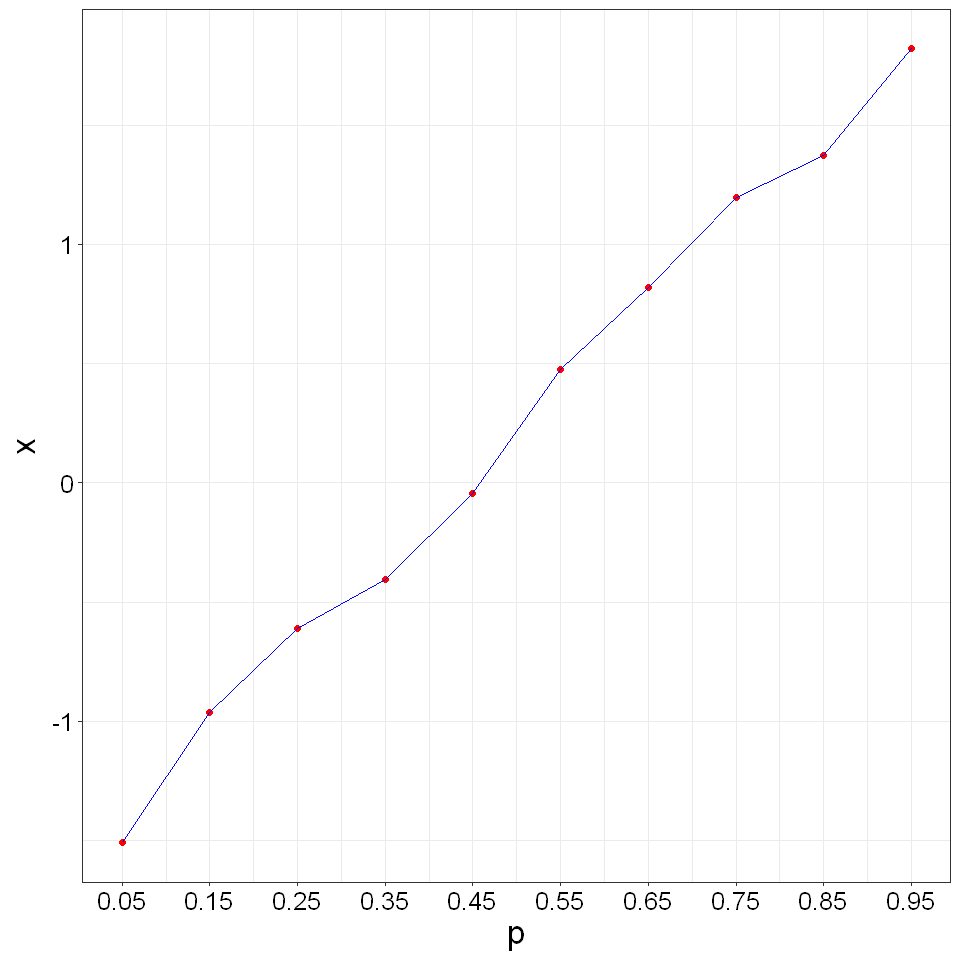

In [3]:
options(repr.plot.width=8, repr.plot.height=8)

set.seed(4711)
qplot_n_10 <- empirical_qplot(rnorm(10), with_title=FALSE) + theme_jupyter(axis_title_size=20)
print(qplot_n_10)

## Empirische Quantilfunktion einer Stichprobe der Normalverteilung (n=100)

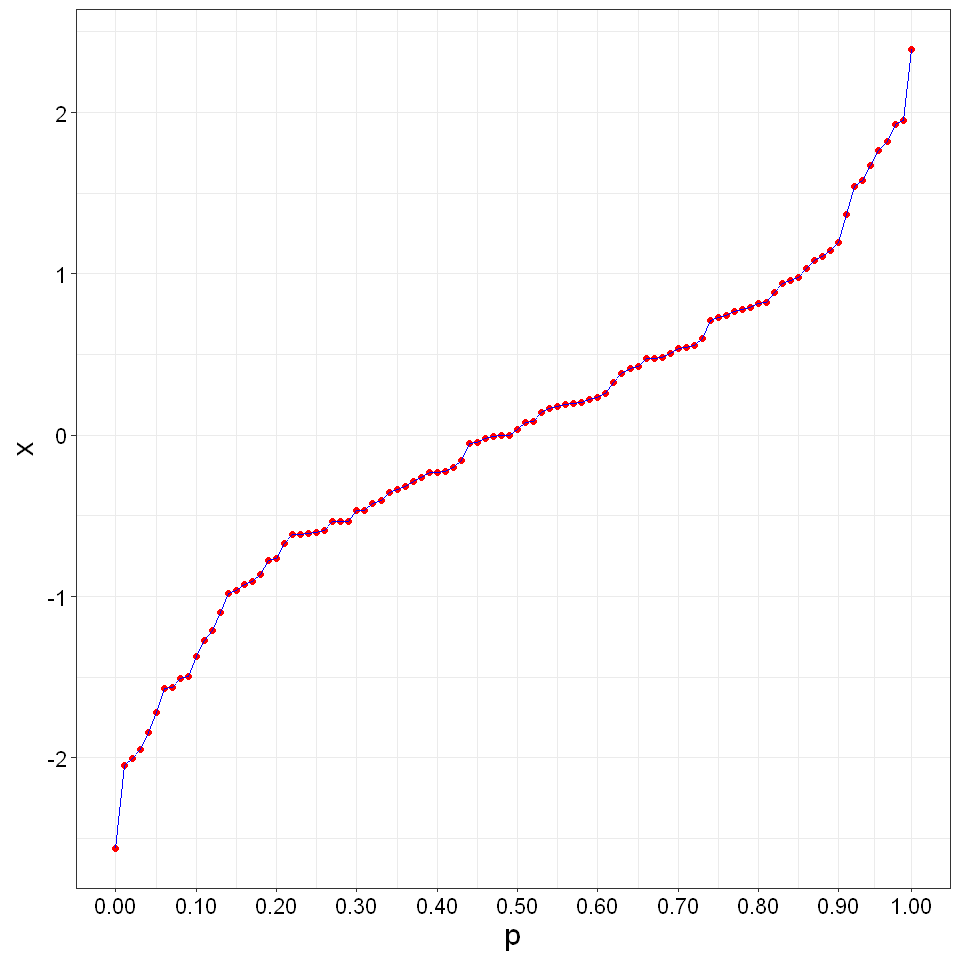

In [4]:
set.seed(4711)
qplot_n_100 <- empirical_qplot(rnorm(100), with_title=FALSE, inc=10) + theme_jupyter(axis_title_size=18)
print(qplot_n_100)